<a href="https://colab.research.google.com/github/JuanPabl07DP/Affectnet/blob/main/Affectnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("ngothienphu/affectnet")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/affectnet


In [9]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

# Ruta al conjunto de datos AffectNet
base_path = "/kaggle/input/affectnet"

# Primero exploramos la estructura del directorio para entender cómo está organizado
print("Contenido del directorio raíz:")
print(os.listdir(base_path))

# Busquemos archivos de anotaciones o metadatos
annotation_files = [f for f in os.listdir(base_path) if f.endswith('.csv') or f.endswith('.txt') or f.endswith('.xlsx')]
print("\nArchivos de anotaciones encontrados:")
print(annotation_files)

# Si hay algún subdirectorio, también exploramos su contenido
for item in os.listdir(base_path):
    item_path = os.path.join(base_path, item)
    if os.path.isdir(item_path):
        print(f"\nContenido del directorio {item}:")
        print(os.listdir(item_path)[:10])  # Mostramos solo los primeros 10 elementos

# Función para buscar y mostrar imágenes de alegría
def show_happy_images(annotations_path, images_dir, emotion_column, happy_value):
    # Cargar anotaciones
    if annotations_path.endswith('.csv'):
        df = pd.read_csv(annotations_path)
    elif annotations_path.endswith('.xlsx'):
        df = pd.read_excel(annotations_path)
    else:
        print(f"Formato de archivo no soportado: {annotations_path}")
        return

    print(f"Columnas disponibles en el archivo de anotaciones: {df.columns.tolist()}")

    # Verificar si la columna especificada existe
    if emotion_column not in df.columns:
        print(f"La columna {emotion_column} no existe en el archivo de anotaciones.")
        return

    # Filtrar imágenes con expresión de alegría
    happy_images = df[df[emotion_column] == happy_value]

    if len(happy_images) == 0:
        print(f"No se encontraron imágenes con el valor {happy_value} en la columna {emotion_column}.")
        return

    print(f"Se encontraron {len(happy_images)} imágenes con expresión de alegría.")

    # Mostrar algunas imágenes aleatorias con expresión de alegría
    num_images = min(5, len(happy_images))
    sample_images = happy_images.sample(num_images)

    plt.figure(figsize=(15, 3 * num_images))

    for i, (_, row) in enumerate(sample_images.iterrows()):
        # Determinar la ruta de la imagen
        img_filename = row.get('subDirectory_filePath', row.get('image_name', row.get('file', None)))

        if img_filename is None:
            print("No se pudo determinar el nombre del archivo de imagen desde las anotaciones.")
            continue

        # Si la ruta incluye subdirectorios
        if '/' in str(img_filename):
            img_path = os.path.join(images_dir, img_filename)
        else:
            img_path = os.path.join(images_dir, img_filename)

        try:
            if os.path.exists(img_path):
                img = Image.open(img_path)
                plt.subplot(num_images, 1, i+1)
                plt.imshow(np.array(img))
                plt.title(f"Imagen con expresión de alegría #{i+1}")
                plt.axis('off')
            else:
                print(f"No se encontró la imagen en: {img_path}")
        except Exception as e:
            print(f"Error al abrir la imagen {img_path}: {e}")

    plt.tight_layout()
    plt.show()

Contenido del directorio raíz:
['affectnet']

Archivos de anotaciones encontrados:
[]

Contenido del directorio affectnet:
['_home_ryanjones_Desktop_facial expression_code_fer_data_archive_train_class_class003_image0029548.jpg', '_home_ryanjones_Desktop_facial expression_code_fer_data_archive_train_class_class005_image0040264.jpg', '_home_ryanjones_Desktop_facial expression_code_fer_data_archive_train_class_class006_image0037878.jpg', '_home_ryanjones_Desktop_facial expression_code_fer_data_archive_train_class_class003_image0005610.jpg', '_home_ryanjones_Desktop_facial expression_code_fer_data_archive_train_class_class005_image0033800.jpg', '_home_ryanjones_Desktop_facial expression_code_fer_data_archive_train_class_class005_image0037790.jpg', '_home_ryanjones_Desktop_facial expression_code_fer_data_archive_train_class_class004_image0031159.jpg', '_home_ryanjones_Desktop_facial expression_code_fer_data_archive_train_class_class003_image0022137.jpg', '_home_ryanjones_Desktop_facial expr

Etiquetas de clases encontradas en el conjunto de datos:
  Clase  Número de imágenes
6   001                4734
5   002                4790
0   003                4650
3   004                4603
1   005                4462
2   006                3611
4   007                4570


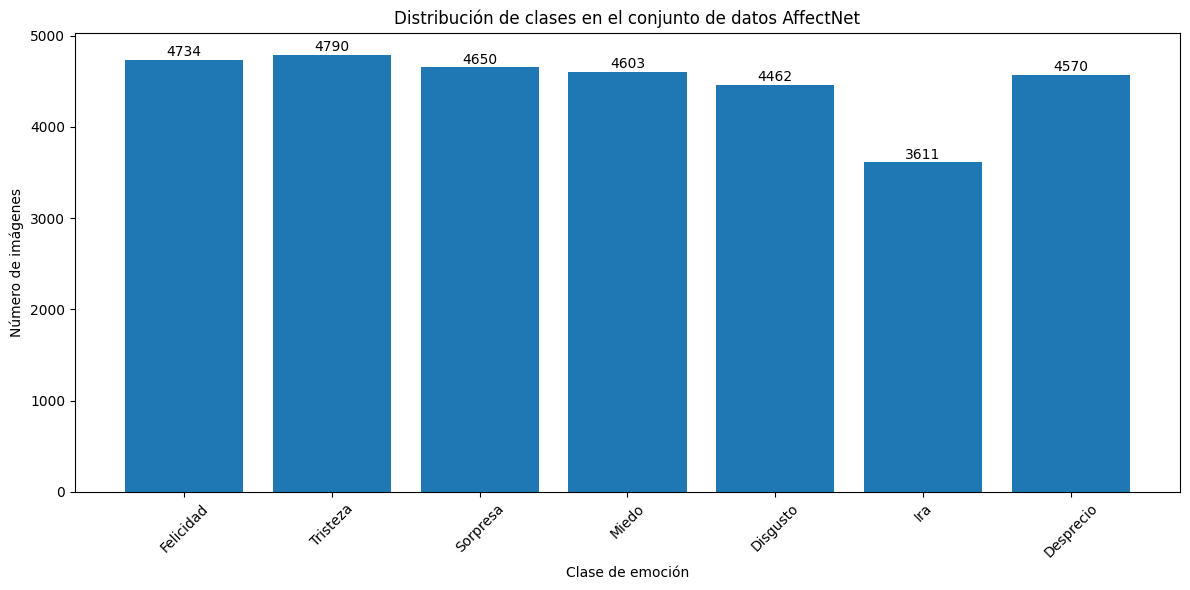

In [12]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import re
from collections import Counter

# Ruta al conjunto de datos AffectNet
base_path = "/kaggle/input/affectnet"
images_dir = os.path.join(base_path, "affectnet")

# Función para extraer las etiquetas de clase de los nombres de archivo
def extract_classes():
    class_pattern = re.compile(r'_class_class(\d+)_')
    classes = []

    for filename in os.listdir(images_dir):
        match = class_pattern.search(filename)
        if match:
            class_number = match.group(1)
            classes.append(class_number)

    return classes

# Extraer las clases
class_labels = extract_classes()

# Contar la frecuencia de cada clase
class_counts = Counter(class_labels)

# Crear un DataFrame para mejor visualización
df_classes = pd.DataFrame({
    'Clase': list(class_counts.keys()),
    'Número de imágenes': list(class_counts.values())
}).sort_values('Clase')

# Mostrar estadísticas de las clases
print("Etiquetas de clases encontradas en el conjunto de datos:")
print(df_classes)

# Mapeo estándar de AffectNet (basado en la documentación común de AffectNet)
standard_labels = {
    '000': 'Neutral',
    '001': 'Felicidad',
    '002': 'Tristeza',
    '003': 'Sorpresa',
    '004': 'Miedo',
    '005': 'Disgusto',
    '006': 'Ira',
    '007': 'Desprecio'
}

# Crear un mapeo para las clases encontradas
class_mapping = {}
for cls in df_classes['Clase']:
    if cls in standard_labels:
        class_mapping[cls] = standard_labels[cls]
    else:
        class_mapping[cls] = f"Clase desconocida {cls}"

# Añadir nombres de emociones al DataFrame
df_classes['Emoción (probable)'] = df_classes['Clase'].map(lambda x: class_mapping.get(x, f"Desconocida {x}"))

# Visualizar la distribución de clases
plt.figure(figsize=(12, 6))
bars = plt.bar(df_classes['Emoción (probable)'], df_classes['Número de imágenes'])

# Añadir etiquetas con el número de imágenes
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 5,
             f'{height}', ha='center', va='bottom')

plt.title('Distribución de clases en el conjunto de datos AffectNet')
plt.xlabel('Clase de emoción')
plt.ylabel('Número de imágenes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

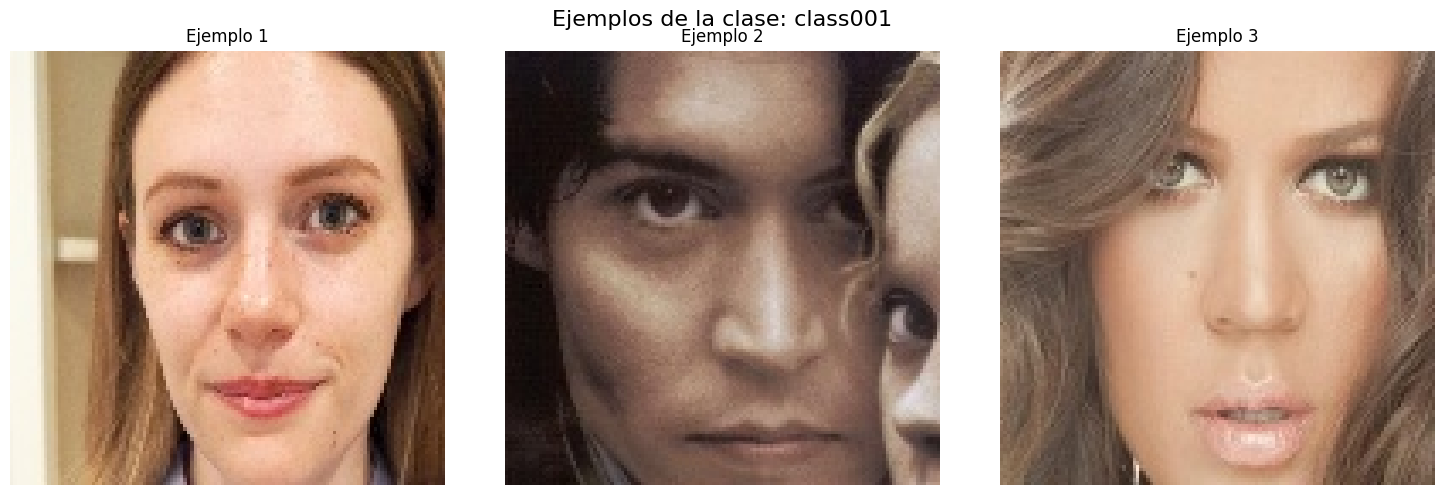

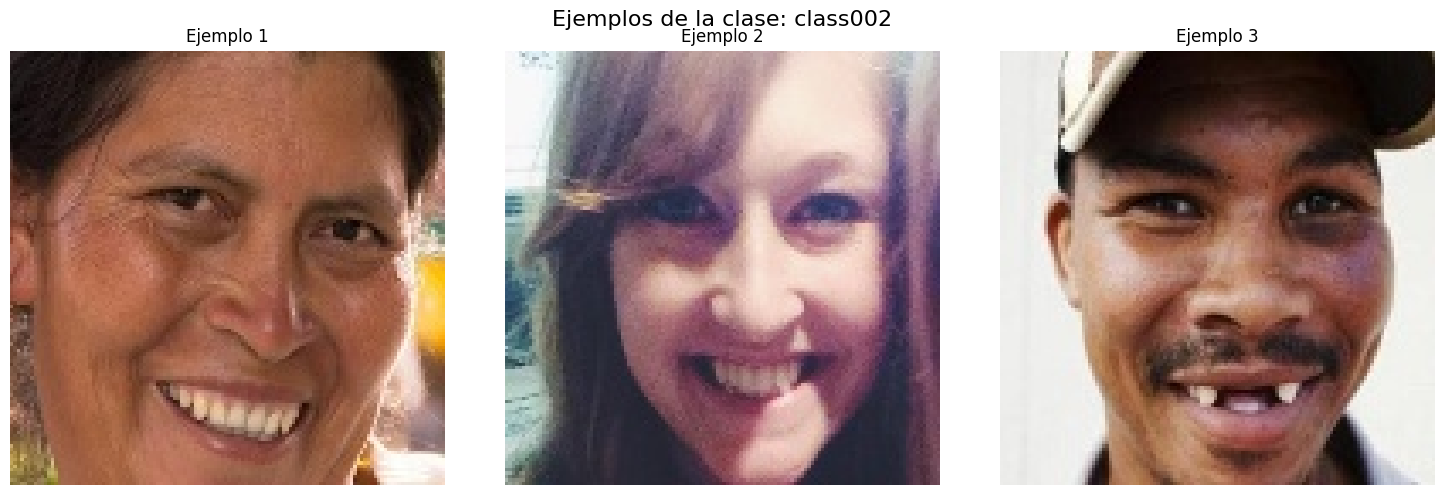

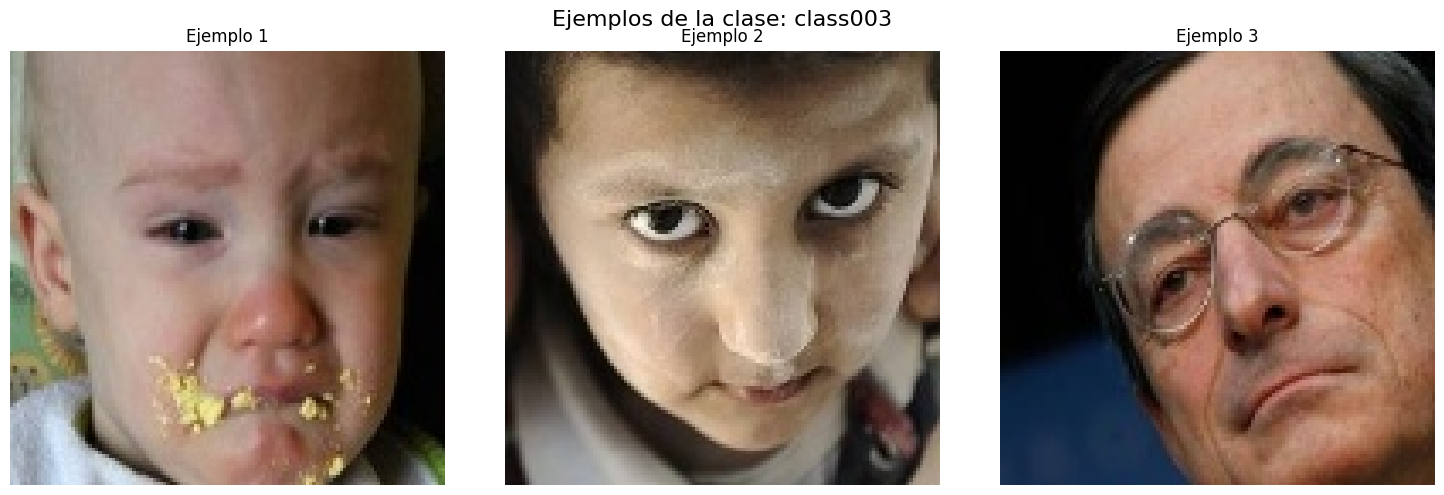

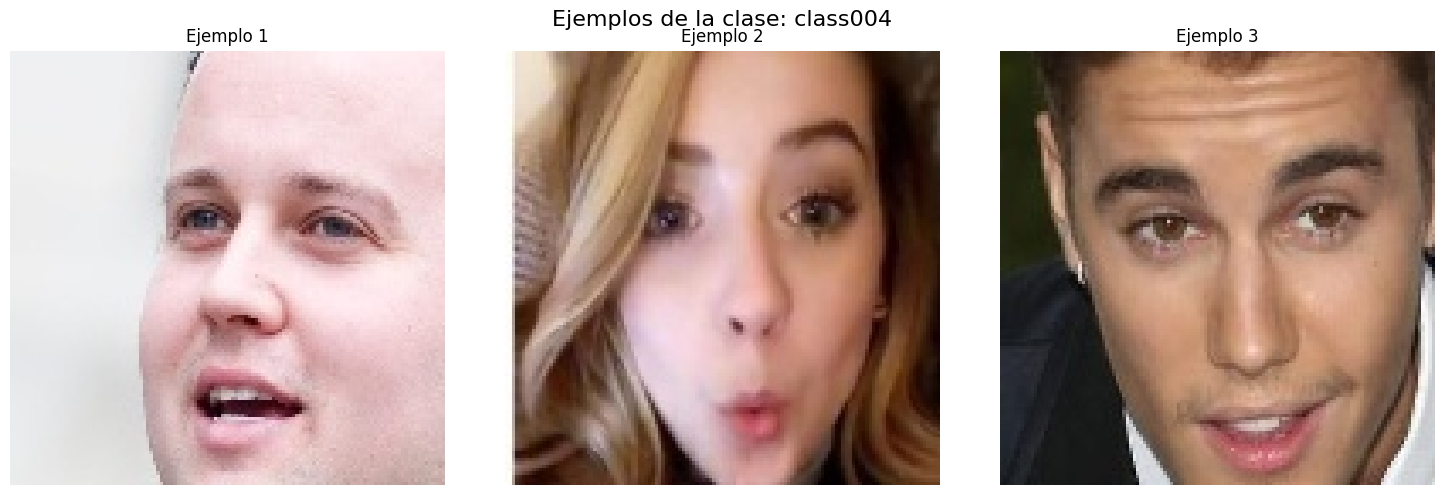

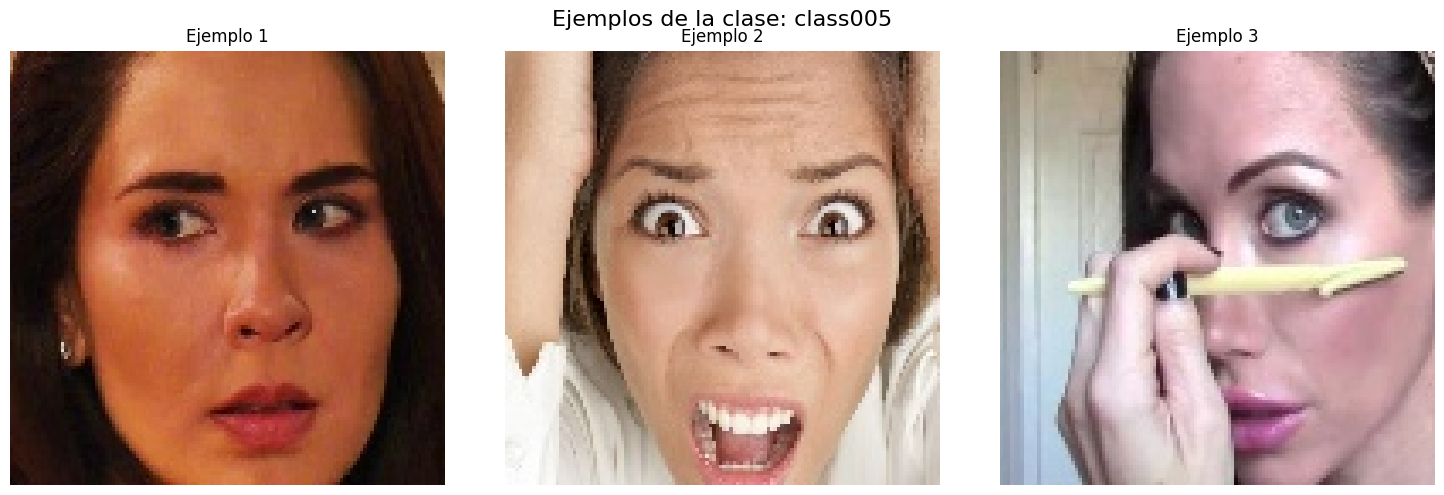

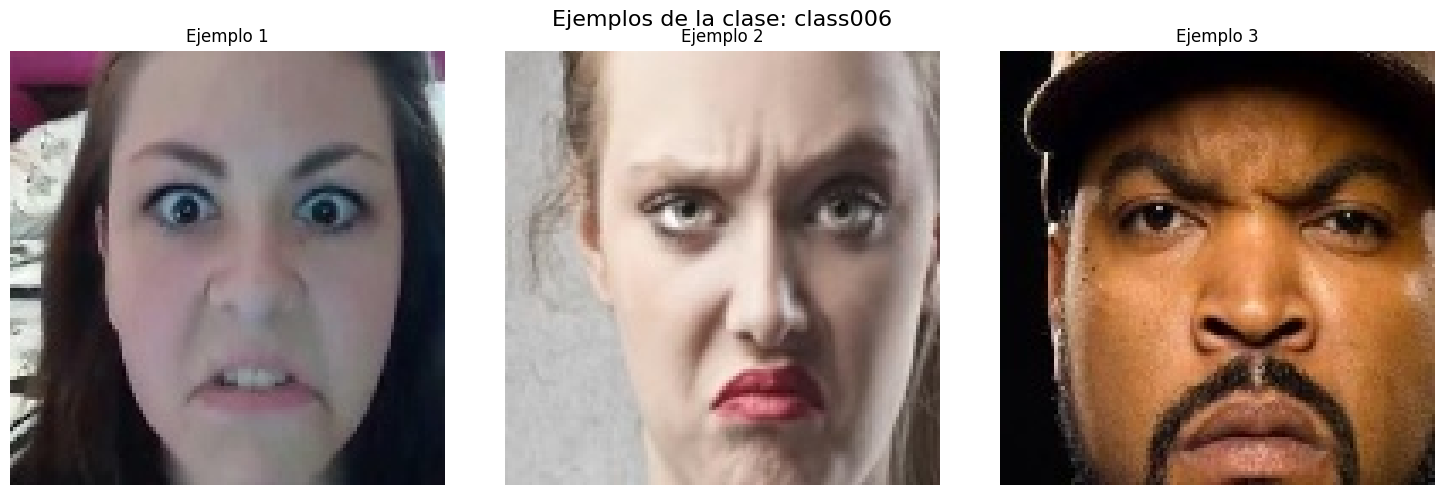

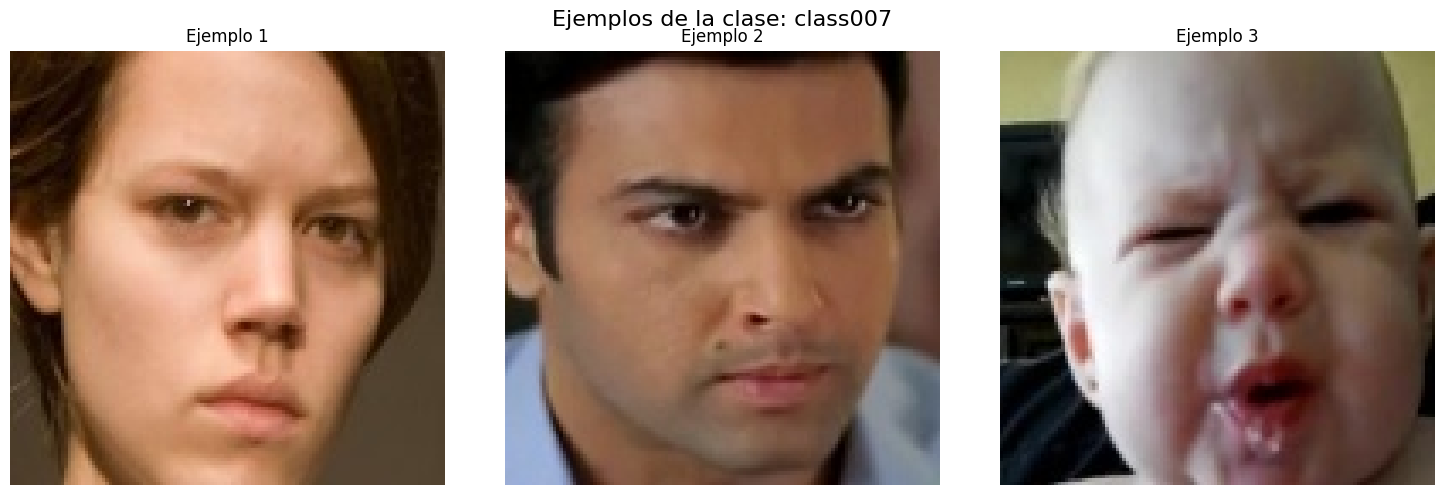

In [13]:
import os
import matplotlib.pyplot as plt
from PIL import Image
import random

# Ruta al conjunto de datos AffectNet
base_path = "/kaggle/input/affectnet"
images_dir = os.path.join(base_path, "affectnet")

# Agrupar imágenes por clase
class_images = {}
for filename in os.listdir(images_dir):
    if "_class_class" in filename:
        class_part = filename.split("_class_")[1].split("_")[0]
        if class_part not in class_images:
            class_images[class_part] = []
        class_images[class_part].append(os.path.join(images_dir, filename))

# Mostrar ejemplos de cada clase
for class_name, images in sorted(class_images.items()):
    if images:
        # Seleccionar hasta 3 imágenes aleatorias por clase
        num_samples = min(3, len(images))
        samples = random.sample(images, num_samples)

        fig, axes = plt.subplots(1, num_samples, figsize=(15, 5))
        fig.suptitle(f'Ejemplos de la clase: {class_name}', fontsize=16)

        for i, img_path in enumerate(samples):
            try:
                img = Image.open(img_path)
                if num_samples == 1:
                    axes.imshow(img)
                    axes.set_title(f"Ejemplo {i+1}")
                    axes.axis('off')
                else:
                    axes[i].imshow(img)
                    axes[i].set_title(f"Ejemplo {i+1}")
                    axes[i].axis('off')
            except Exception as e:
                print(f"Error al abrir la imagen para la clase {class_name}: {e}")

        plt.tight_layout()
        plt.show()

Se encontraron 4734 imágenes con expresión de alegría.


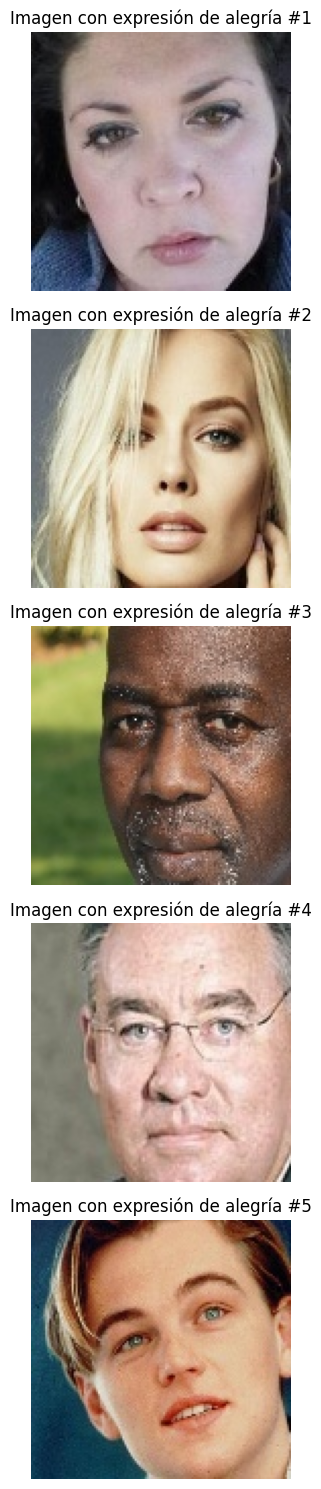

In [10]:
import os
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import random

base_path = "/kaggle/input/affectnet"
images_dir = os.path.join(base_path, "affectnet")

happy_images = []
for filename in os.listdir(images_dir):
    if "class001" in filename:
        happy_images.append(os.path.join(images_dir, filename))

if len(happy_images) == 0:
    print("No se encontraron imágenes con expresión de alegría (class001).")

    all_classes = set()
    for filename in os.listdir(images_dir):
        if "_class_class" in filename:
            class_part = filename.split("_class_")[1].split("_")[0]
            all_classes.add(class_part)

    print("Clases disponibles:", sorted(list(all_classes)))
else:
    print(f"Se encontraron {len(happy_images)} imágenes con expresión de alegría.")

    num_images = min(5, len(happy_images))
    sample_images = random.sample(happy_images, num_images)

    plt.figure(figsize=(15, 3 * num_images))

    for i, img_path in enumerate(sample_images):
        try:
            img = Image.open(img_path)
            plt.subplot(num_images, 1, i+1)
            plt.imshow(np.array(img))
            plt.title(f"Imagen con expresión de alegría #{i+1}")
            plt.axis('off')
        except Exception as e:
            print(f"Error al abrir la imagen {img_path}: {e}")

    plt.tight_layout()
    plt.show()

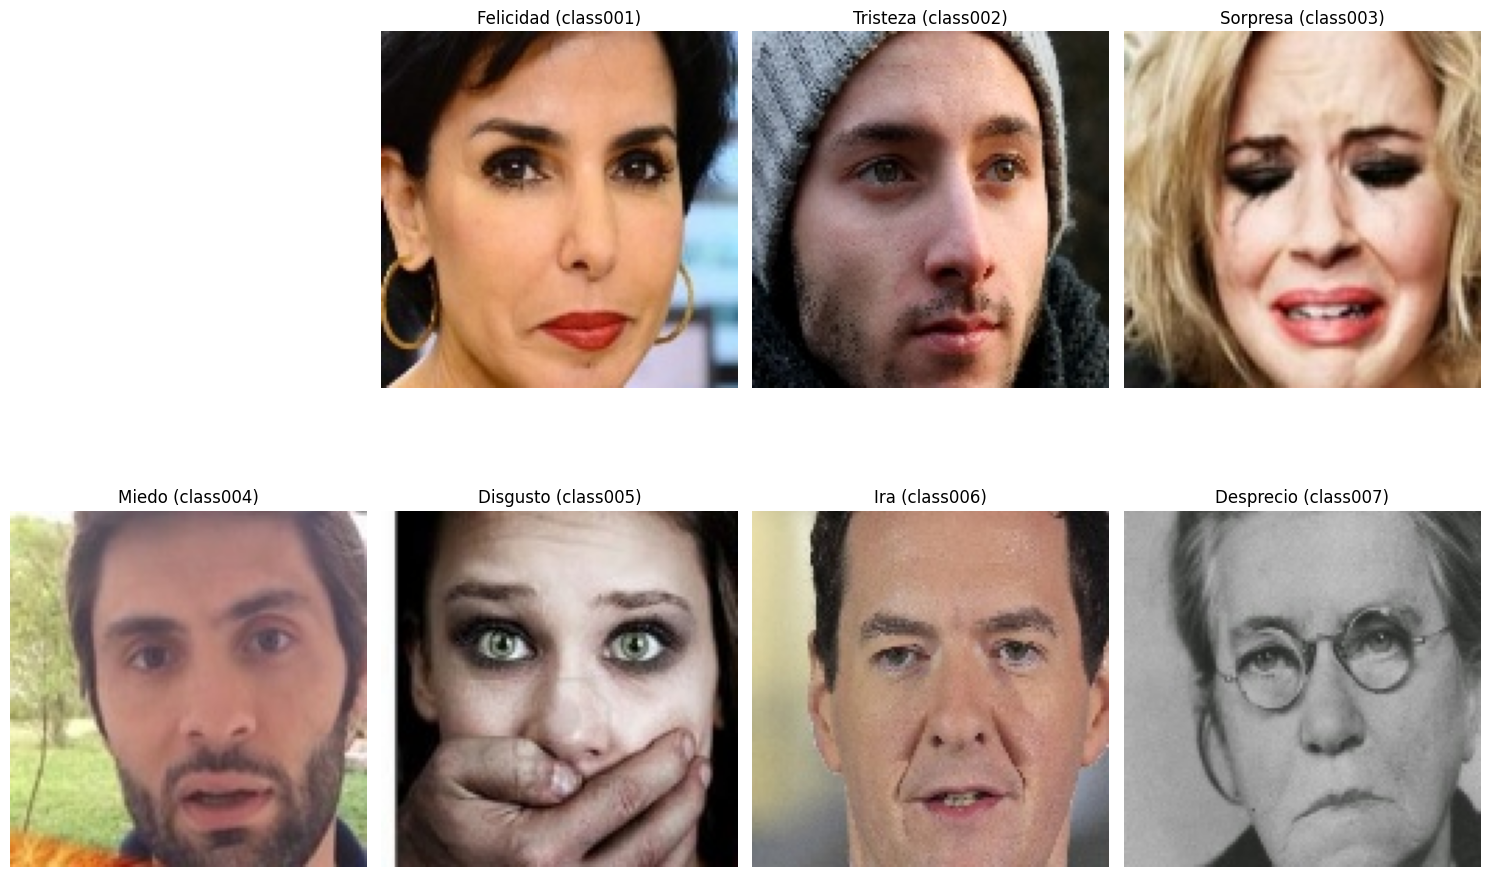

In [15]:
import os
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import random

# Ruta al conjunto de datos AffectNet
base_path = "/kaggle/input/affectnet"
images_dir = os.path.join(base_path, "affectnet")

# Definir las clases y sus nombres (ajusta según corresponda)
class_mapping = {
    "class000": "Neutral",
    "class001": "Felicidad",
    "class002": "Tristeza",
    "class003": "Sorpresa",
    "class004": "Miedo",
    "class005": "Disgusto",
    "class006": "Ira",
    "class007": "Desprecio"
}

# Recolectar imágenes por clase
class_images = {}
for class_code, class_name in class_mapping.items():
    class_images[class_code] = []
    for filename in os.listdir(images_dir):
        if class_code in filename:
            class_images[class_code].append(os.path.join(images_dir, filename))

# Mostrar una imagen de cada clase (si está disponible)
plt.figure(figsize=(15, 10))
for i, (class_code, images) in enumerate(class_images.items()):
    if images:
        img_path = random.choice(images)
        try:
            img = Image.open(img_path)
            plt.subplot(2, 4, i+1)
            plt.imshow(np.array(img))
            plt.title(f"{class_mapping[class_code]} ({class_code})")
            plt.axis('off')
        except Exception as e:
            print(f"Error al abrir la imagen para {class_mapping[class_code]}: {e}")

plt.tight_layout()
plt.show()

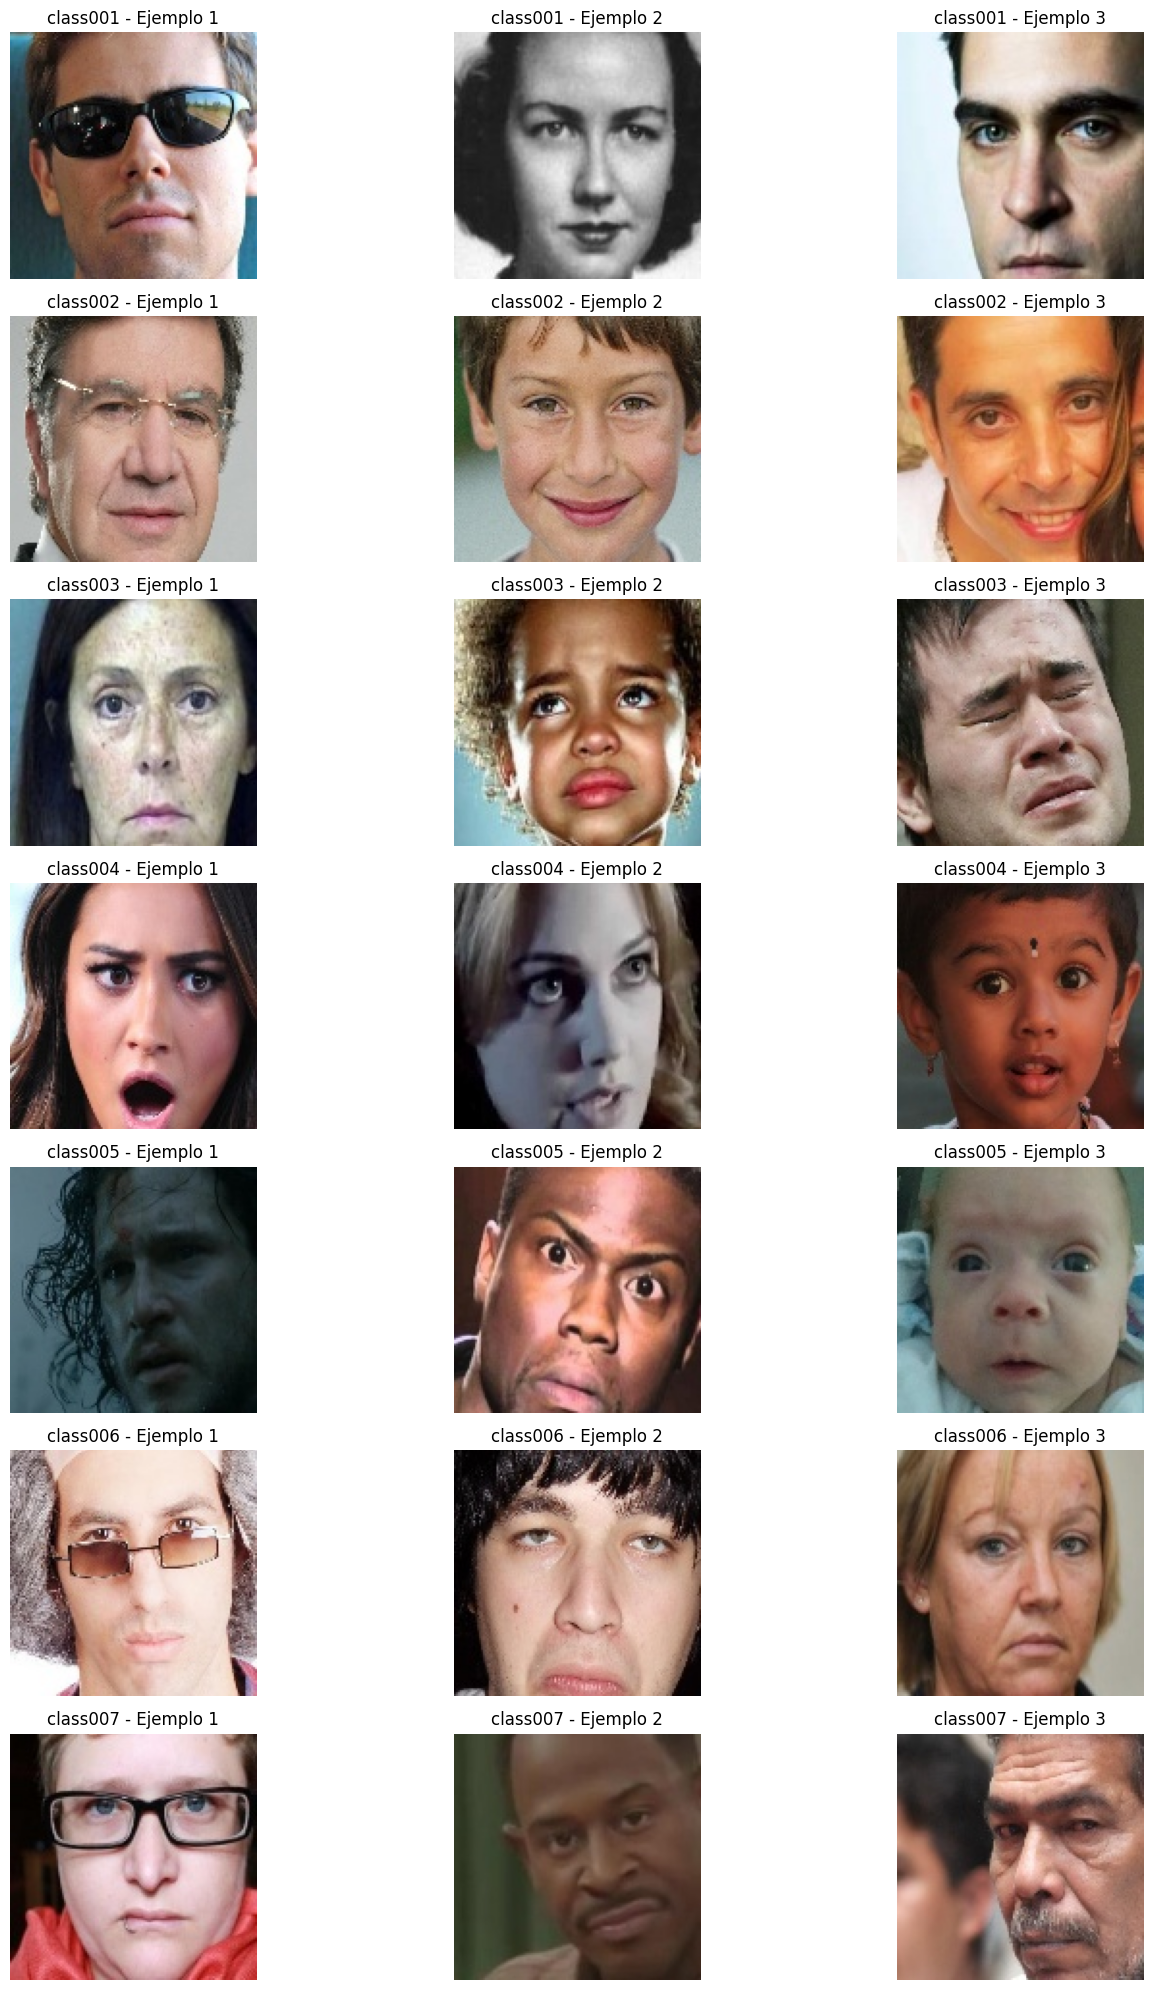

In [16]:
import os
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import random

# Ruta al conjunto de datos AffectNet
base_path = "/kaggle/input/affectnet"
images_dir = os.path.join(base_path, "affectnet")

# Vamos a mostrar ejemplos de cada clase disponible para identificar cuál es neutral
class_examples = {}
for class_num in ['class001', 'class002', 'class003', 'class004', 'class005', 'class006', 'class007']:
    class_examples[class_num] = []
    for filename in os.listdir(images_dir):
        if class_num in filename:
            class_examples[class_num].append(os.path.join(images_dir, filename))
            # Solo necesitamos unos pocos ejemplos por clase
            if len(class_examples[class_num]) >= 3:
                break

# Mostrar ejemplos de cada clase para identificar visualmente la neutral
fig = plt.figure(figsize=(15, 20))
for i, (class_num, examples) in enumerate(class_examples.items()):
    if examples:
        for j, img_path in enumerate(examples[:3]):
            try:
                img = Image.open(img_path)
                plt.subplot(7, 3, i*3 + j + 1)
                plt.imshow(np.array(img))
                plt.title(f"{class_num} - Ejemplo {j+1}")
                plt.axis('off')
            except Exception as e:
                print(f"Error al abrir la imagen para {class_num}: {e}")

plt.tight_layout()
plt.show()


Se encontraron 4734 imágenes con expresión neutral (clase 001).


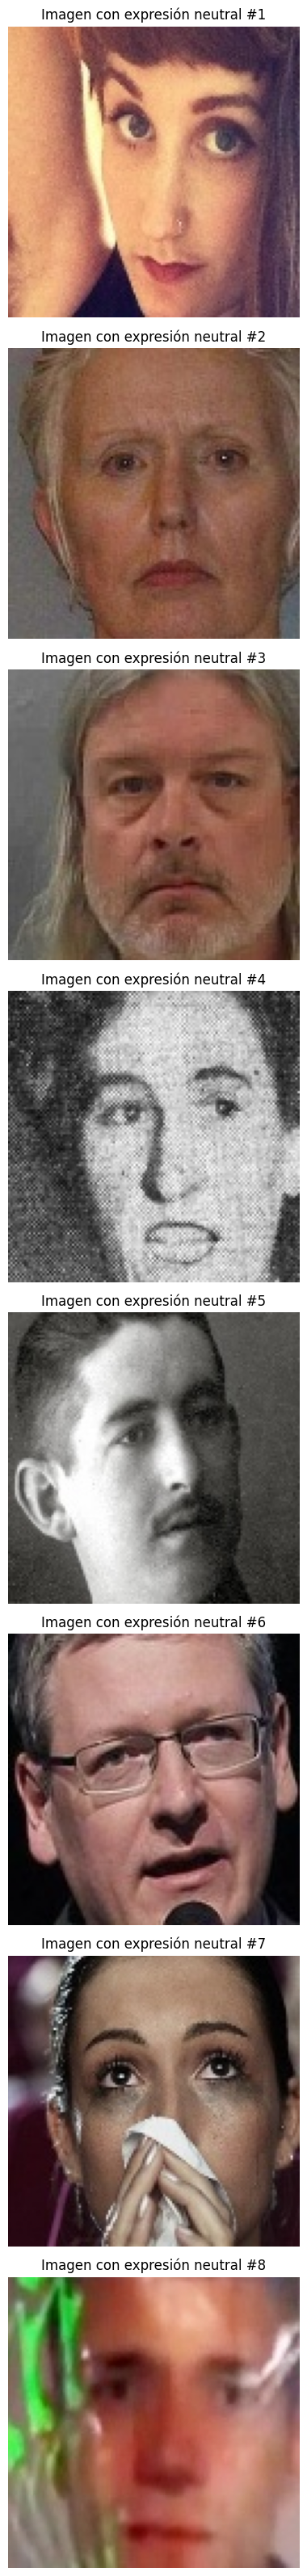

In [17]:
import os
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import random

# Ruta al conjunto de datos AffectNet
base_path = "/kaggle/input/affectnet"
images_dir = os.path.join(base_path, "affectnet")

# Clase 001 corresponde a expresión neutral según lo indicado
neutral_class = "class001"

# Buscar todas las imágenes con expresión neutral (clase 001)
neutral_images = []
for filename in os.listdir(images_dir):
    if neutral_class in filename:
        neutral_images.append(os.path.join(images_dir, filename))

print(f"Se encontraron {len(neutral_images)} imágenes con expresión neutral (clase 001).")

# Mostrar varias imágenes aleatorias con expresión neutral
num_images = min(8, len(neutral_images))
sample_images = random.sample(neutral_images, num_images)

plt.figure(figsize=(15, 4 * num_images))

for i, img_path in enumerate(sample_images):
    try:
        img = Image.open(img_path)
        plt.subplot(num_images, 1, i+1)
        plt.imshow(np.array(img))
        plt.title(f"Imagen con expresión neutral #{i+1}")
        plt.axis('off')
    except Exception as e:
        print(f"Error al abrir la imagen {img_path}: {e}")

plt.tight_layout()
plt.show()